In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
'load killings'
police = pd.read_csv('fatal-police-shootings-data.csv')
police['city'] = police['city'].str.replace(r' city', '') #removes anything with a lower-cased ' city', done to try to clean up data
police['city'] = police['city'].str.replace(r'St ', 'St. ')#St Louis in police is St. Louis in CityPopulation2000
police['city'] = police['city'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 


police


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [3]:
print(police['race'].value_counts())
o = police.copy()
not_o = o[o['race'] != 'O' ].index
o.drop(not_o, inplace=True)
o

W    2106
B    1102
H     802
A      79
N      72
O      40
Name: race, dtype: int64


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
38,68,Zaki Shinwary,2015-01-16,shot and Tasered,knife,48.0,M,O,Fremont,CA,False,other,Not fleeing,False
327,418,Fridoon Zalbeg Nehad,2015-04-30,shot,unarmed,42.0,M,O,San Diego,CA,True,other,Not fleeing,True
332,428,Nadir Soofi,2015-05-03,shot,gun,34.0,M,O,Garland,TX,False,attack,Not fleeing,False
352,449,Bruce Zalonka,2015-05-12,shot and Tasered,gun,46.0,M,O,Honolulu,HI,False,attack,Not fleeing,False
387,491,Feras Morad,2015-05-27,shot and Tasered,unarmed,20.0,M,O,Long Beach,CA,False,other,Not fleeing,False
524,649,Mohammad Youssef Abdulazeez,2015-07-16,shot,gun,24.0,M,O,Chattanooga,TN,True,attack,Not fleeing,False
724,857,Robert Berger,2015-09-23,shot,knife,48.0,M,O,Salt Lake City,UT,False,attack,Not fleeing,False
731,865,Philip Quinn,2015-09-24,shot,screwdriver,30.0,M,O,St. Paul,MN,True,other,Not fleeing,False
754,895,Omar Ali,2015-10-05,shot,unarmed,27.0,M,O,Akron,OH,False,other,Not fleeing,False
813,956,Kobvey Igbuhay,2015-10-26,shot,unarmed,18.0,M,O,Tampa,FL,False,attack,Foot,False


In [4]:
'making racial csvs'
black = police.copy()
not_black = black[black['race'] != 'B' ].index
black.drop(not_black, inplace=True)
black

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False
11,21,Ron Sneed,2015-01-07,shot,gun,31.0,M,B,Freeport,TX,False,attack,Not fleeing,False
12,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False
14,27,Omarr Julian Maximillian Jackson,2015-01-07,shot,gun,37.0,M,B,New Orleans,LA,False,attack,Foot,True
17,36,Artago Damon Howard,2015-01-08,shot,unarmed,36.0,M,B,Strong,AR,False,attack,Not fleeing,False
26,49,Marcus Golden,2015-01-14,shot,NaN,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False
28,51,Mario Jordan,2015-01-14,shot,gun,34.0,M,B,Chesapeake,VA,True,attack,Not fleeing,False
32,56,Donte Sowell,2015-01-15,shot,gun,27.0,M,B,Indianapolis,IN,False,attack,Foot,False
33,57,Kavonda Earl Payton,2015-01-15,shot,gun,39.0,M,B,Aurora,CO,False,attack,Not fleeing,False
39,74,Terence Walker,2015-01-17,shot,gun,21.0,M,B,Muskogee,OK,False,attack,Foot,True


In [5]:
white = police.copy()
not_white = white[white['race'] != 'W' ].index
white.drop(not_white, inplace=True)
white

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
10,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,False,attack,Not fleeing,False
13,25,Nicholas Ryan Brickman,2015-01-07,shot,gun,30.0,M,W,Des Moines,IA,False,attack,Car,False
15,29,Loren Simpson,2015-01-08,shot,NaN,28.0,M,W,Huntley,MT,False,undetermined,Not fleeing,False
16,32,James Dudley Barker,2015-01-08,shot,shovel,42.0,M,W,Salt Lake City,UT,False,attack,Not fleeing,True
18,37,Thomas Hamby,2015-01-08,shot,gun,49.0,M,W,Syracuse,UT,False,attack,Not fleeing,True


In [6]:
hispanic = police.copy()
not_hispanic = hispanic[hispanic['race'] != 'H' ].index
hispanic.drop(not_hispanic, inplace=True)
hispanic


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
20,325,Andy Martinez,2015-01-09,shot,gun,33.0,M,H,El Paso,TX,False,attack,Not fleeing,False
22,43,Brian Barbosa,2015-01-11,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False
23,45,Salvador Figueroa,2015-01-11,shot and Tasered,gun,29.0,M,H,North Las Vegas,NV,False,attack,Foot,False
35,63,Jose Ceja,2015-01-15,shot,knife,36.0,M,H,Fairfield,CA,True,other,Not fleeing,False
40,75,Pablo Meza,2015-01-17,shot,gun,24.0,M,H,Los Angeles,CA,False,attack,Not fleeing,False
41,78,Daniel Brumley,2015-01-17,shot,knife,27.0,M,H,Fort Worth,TX,False,attack,Not fleeing,False
47,88,Miguel Angel de Santos-Rodriguez,2015-01-21,shot,gun,36.0,M,H,Chapeno,TX,False,attack,Foot,False


In [7]:
asian = police.copy()
not_asian = asian[asian['race'] != 'A' ].index
asian.drop(not_asian, inplace=True)
asian

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
69,346,Matautu Nuu,2015-01-28,shot and Tasered,hammer,35.0,M,A,Stockton,CA,True,attack,Not fleeing,False
155,195,Hung Trieu,2015-03-01,shot,gun,35.0,M,A,Houston,TX,False,attack,Not fleeing,False
160,249,Carl Lao,2015-03-04,shot,gun,28.0,M,A,Stockton,CA,False,attack,Not fleeing,False
265,359,Joseph Jeremy Weber,2015-04-08,shot,knife,28.0,M,A,Sunnyvale,CA,True,other,Not fleeing,False
303,397,Lue Vang,2015-04-22,shot,gun,39.0,M,A,Eldorado Springs,CO,False,attack,Not fleeing,False
337,430,Thong Kien Ma,2015-05-05,shot,knife,32.0,M,A,South El Monte,CA,False,attack,Not fleeing,False
468,601,Ton Nguyen,2015-07-02,shot,knife,60.0,M,A,San Diego,CA,False,other,Not fleeing,False
685,879,William Chau,2015-09-09,shot,knife,59.0,M,A,El Monte,CA,False,attack,Not fleeing,False
686,817,Tian Ma,2015-09-10,shot,knife,31.0,M,A,Potsdam,NY,False,attack,Not fleeing,False


In [8]:
native_amer = police.copy()
not_native_amer = native_amer[native_amer['race'] != 'N' ].index
native_amer.drop(not_native_amer, inplace=True)
native_amer


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
64,348,Nicolas Leland Tewa,2015-01-27,shot,NaN,26.0,M,N,Phoenix,AZ,False,other,Not fleeing,False
211,531,Justin Fowler,2015-03-20,shot,gun,24.0,M,N,Red Valley,AZ,False,attack,Car,False
296,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False
438,563,Joe Charboneau,2015-06-16,shot,gun,31.0,M,N,Wood Lake,ND,False,attack,Not fleeing,False
508,628,Paul Castaway,2015-07-12,shot,knife,35.0,M,N,Denver,CO,True,other,Foot,False
525,656,Saige Hack,2015-07-16,shot,gun,23.0,M,N,Cheyenne,WY,False,attack,Not fleeing,False
681,836,Tristan Vent,2015-09-08,shot,gun,19.0,M,N,Fairbanks,AK,False,attack,Not fleeing,False
684,816,Vincent J. Perdue,2015-09-09,shot,gun,33.0,M,N,Fairbanks,AK,False,attack,Car,False
742,877,Patrick Stephen Lundstrom,2015-09-29,shot,blunt object,46.0,M,N,Rapid City,SD,False,attack,Not fleeing,False
1018,1166,Herman Bean,2016-01-12,shot,knife,49.0,M,N,Spenard,AK,True,other,Not fleeing,False


In [9]:
'loading population'
city_population = pd.read_csv('CityPopulation2000.csv', encoding = "ISO-8859-1")

print(city_population.dtypes) #shows the type of data contained in cells

city_population['Population'] = city_population['Population'].str.replace(r'\(r.*\)', '')#removes anything that has a (r) in it, done to try to clean up data
city_population['City'] = city_population['City'].str.replace(r"[\s\S]*.*(balance).*[\s\S]", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
city_population['City'] = city_population['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
city_population['City'] = city_population['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
city_population['City'] = city_population['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
city_population['City'] = city_population['City'].str.replace(r' village', '')#removes lowercase villages
city_population['City'] = city_population['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
city_population['City'] = city_population['City'].str.replace(r' town', '')#removes lowercase town
city_population['City'] = city_population['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu
city_population['City'] = city_population['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
city_population['City'] = city_population['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 

type_dict = {'Geographic Area': 'str', 'City': 'str', 'Population': 'int64'}#done to change population values into an integer
city_population = city_population.astype(type_dict)#done to change population values into an integer

print(city_population.dtypes)
print(len(city_population))

print(len(city_population))

city_population

Geographic Area    object
City               object
Population         object
dtype: object
Geographic Area    object
City               object
Population          int64
dtype: object
29523
29523


,Geographic Area,City,Population
0,AL,Abanda,192
1,AL,Abbeville,2688
2,AL,Adamsville,4522
3,AL,Addison,758
4,AL,Akron,356
5,AL,Alabaster,30352
6,AL,Albertville,21160
7,AL,Alexander City,14875
8,AL,Alexandria,3917
9,AL,Aliceville,2486


In [10]:
'getting number of shootings per city per race'
csk_n=native_amer.groupby(["city", "state"]).size() 
csk_a=asian.groupby(["city", "state"]).size() 
csk_h=hispanic.groupby(["city", "state"]).size() 
csk_w=white.groupby(["city", "state"]).size() 
csk_b=black.groupby(["city", "state"]).size() 

lst_csk_n = list(csk_n)
lst_csk_a = list(csk_a)
lst_csk_h = list(csk_h)
lst_csk_w = list(csk_w)
lst_csk_b = list(csk_b)

In [11]:
'creating list of city-state associations'
csk_dict_n=dict(csk_n)
csk_dict_a=dict(csk_a)
csk_dict_h=dict(csk_h)
csk_dict_w=dict(csk_w)
csk_dict_b=dict(csk_b)

lst_csk_dict_n=list(csk_dict_n)
lst_csk_dict_a=list(csk_dict_a)
lst_csk_dict_h=list(csk_dict_h)
lst_csk_dict_w=list(csk_dict_w)
lst_csk_dict_b=list(csk_dict_b)

In [12]:
'create list with city, police shootings, and state'
def make_list_of_city_kill_state(kill_count,city_state):
    lst=[]
    for i in range(len(kill_count)):
        lst.append([city_state[i][0],kill_count[i],city_state[i][1]])
    return lst

In [13]:
city_kill_state_n = make_list_of_city_kill_state(lst_csk_n,lst_csk_dict_n)

In [14]:
city_kill_state_a = make_list_of_city_kill_state(lst_csk_a,lst_csk_dict_a)

In [15]:
city_kill_state_h = make_list_of_city_kill_state(lst_csk_h,lst_csk_dict_h)

In [16]:
city_kill_state_w = make_list_of_city_kill_state(lst_csk_w,lst_csk_dict_w)

In [17]:
city_kill_state_b = make_list_of_city_kill_state(lst_csk_b,lst_csk_dict_b)

In [18]:
'make a list of city populations'
city_pop_lst=[]
for i in range(len(city_population)):
    city_pop_lst.append([city_population['City'][i],city_population['Population'][i],city_population['Geographic Area'][i]])
print(len(city_pop_lst))
city_pop_lst


29523


[['Abanda', 192, 'AL'],
 ['Abbeville', 2688, 'AL'],
 ['Adamsville', 4522, 'AL'],
 ['Addison', 758, 'AL'],
 ['Akron', 356, 'AL'],
 ['Alabaster', 30352, 'AL'],
 ['Albertville', 21160, 'AL'],
 ['Alexander City', 14875, 'AL'],
 ['Alexandria', 3917, 'AL'],
 ['Aliceville', 2486, 'AL'],
 ['Allgood', 622, 'AL'],
 ['Altoona', 933, 'AL'],
 ['Andalusia', 9015, 'AL'],
 ['Anderson', 282, 'AL'],
 ['Anniston', 23106, 'AL'],
 ['Arab', 8050, 'AL'],
 ['Ardmore', 1194, 'AL'],
 ['Argo', 4071, 'AL'],
 ['Ariton', 764, 'AL'],
 ['Arley', 357, 'AL'],
 ['Ashford', 2148, 'AL'],
 ['Ashland', 2037, 'AL'],
 ['Ashville', 2212, 'AL'],
 ['Athens', 21897, 'AL'],
 ['Atmore', 10194, 'AL'],
 ['Attalla', 6048, 'AL'],
 ['Auburn', 53380, 'AL'],
 ['Autaugaville', 870, 'AL'],
 ['Avon', 543, 'AL'],
 ['Axis', 757, 'AL'],
 ['Babbie', 603, 'AL'],
 ['Baileyton', 610, 'AL'],
 ['Bakerhill', 279, 'AL'],
 ['Ballplay', 1580, 'AL'],
 ['Banks', 179, 'AL'],
 ['Bay Minette', 8044, 'AL'],
 ['Bayou La Batre', 2558, 'AL'],
 ['Bear Creek', 1070

In [19]:
'taking care of division by zero error that could pop up'
city_pop_lst[25325][1]=1#the population of this used to be 0...
city_pop_lst[25325]

['Laredo Ranchettes West', 1, 'TX']

In [20]:
'taking care of division by zero that could pop up'
city_pop_lst[3331][1]=1#the population of this used to be 0...
city_pop_lst[3331]

['University of California Merced', 1, 'CA']

In [21]:
'making a few functions to help later'
def find_city(city_name,lst):
    for i in range(len(lst)):
        if city_name in lst[i][0]:
            print(lst[i])
            print(i)
def find_repeats(lst):
    for i in range(len(lst)):
        if len(lst[i])>4:
            print(lst[i])
def find_emptys(lst):
    for i in range(len(lst)):
        if len(lst[i])==3:
            print(lst[i])
killings_per_capita_eq_n=city_kill_state_n.copy()
killings_per_capita_eq_a=city_kill_state_a.copy()
killings_per_capita_eq_h=city_kill_state_h.copy()
killings_per_capita_eq_w=city_kill_state_w.copy()
killings_per_capita_eq_b=city_kill_state_b.copy()


In [22]:
'Adding Race'
comp_4 = pd.read_csv('ShareRaceByCity.csv', encoding = "ISO-8859-1")

comp_4['share_white'] = comp_4['share_white'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_white'] = comp_4['share_white'].str.replace(r'.*\-.*', '0')
comp_4['share_white'] = comp_4['share_white'].str.replace(r'\+', '')
comp_4['share_white'] = comp_4['share_white'].str.replace(r'\,', '')

comp_4['share_black'] = comp_4['share_black'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_black'] = comp_4['share_black'].str.replace(r'.*\-.*', '0')
comp_4['share_black'] = comp_4['share_black'].str.replace(r'\+', '')
comp_4['share_black'] = comp_4['share_black'].str.replace(r'\,', '')

comp_4['share_native_american'] = comp_4['share_native_american'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_native_american'] = comp_4['share_native_american'].str.replace(r'.*\-.*', '0')
comp_4['share_native_american'] = comp_4['share_native_american'].str.replace(r'\+', '')
comp_4['share_native_american'] = comp_4['share_native_american'].str.replace(r'\,', '')

comp_4['share_asian'] = comp_4['share_asian'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_asian'] = comp_4['share_asian'].str.replace(r'.*\-.*', '0')
comp_4['share_asian'] = comp_4['share_asian'].str.replace(r'\+', '')
comp_4['share_asian'] = comp_4['share_asian'].str.replace(r'\,', '')

comp_4['share_hispanic'] = comp_4['share_hispanic'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_hispanic'] = comp_4['share_hispanic'].str.replace(r'.*\-.*', '0')
comp_4['share_hispanic'] = comp_4['share_hispanic'].str.replace(r'\+', '')
comp_4['share_hispanic'] = comp_4['share_hispanic'].str.replace(r'\,', '')

comp_4['City'] = comp_4['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
comp_4['City'] = comp_4['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 
comp_4['City'] = comp_4['City'].str.replace(r" (balance)", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
comp_4['City'] = comp_4['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
comp_4['City'] = comp_4['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
comp_4['City'] = comp_4['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
comp_4['City'] = comp_4['City'].str.replace(r' village', '')#removes lowercase villages
comp_4['City'] = comp_4['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
comp_4['City'] = comp_4['City'].str.replace(r' town', '')#removes lowercase town
comp_4['City'] = comp_4['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu


type_dict_4 = {'Geographic Area': 'str', 'City': 'str', 'share_white': 'float64', 'share_black': 'float64', 'share_native_american': 'float64', 'share_asian': 'float64', 'share_hispanic': 'float64'}#done to change population values into an integer

comp_4 = comp_4.astype(type_dict_4)#done to change population values into an integer

In [23]:
'making data useable'
comp_4_lst=[]
for i in range(len(comp_4)):
    comp_4_lst.append([comp_4['City'][i],[float(comp_4['share_white'][i]),float(comp_4['share_black'][i]),float(comp_4['share_native_american'][i]),float(comp_4['share_asian'][i]),float(comp_4['share_hispanic'][i])],comp_4['Geographic Area'][i]])


In [24]:
"making the function that makes list of kills per capita"
def per_capita(city_kill_state,city_pop_lst):
    for i in range(len(city_kill_state)):
        for x in range(len(city_pop_lst)):
            if city_kill_state[i][0] == city_pop_lst[x][0]:
                if city_kill_state[i][2] == city_pop_lst[x][2]:
                    per_capita =100000 * float(city_kill_state[i][1])/float(city_pop_lst[x][1])
                    city_kill_state[i].extend([float(city_pop_lst[x][1]),per_capita])
    print(len(city_kill_state))
    return city_kill_state
'''def per_capita_n(city_kill_state,city_pop_lst):
    for i in range(len(city_kill_state)):
        for x in range(len(city_pop_lst)):
            if city_kill_state[i][0] == city_pop_lst[x][0]:
                if city_kill_state[i][2] == city_pop_lst[x][2]:
                    per_capita =100000 * float(city_kill_state[i][1])/(float(city_pop_lst[x][1])*float(comp_4_lst[1][2]))
                    city_kill_state[i].extend([float(city_pop_lst[x][1]),per_capita])
    print(len(city_kill_state))
    return city_kill_state
def per_capita_a(city_kill_state,city_pop_lst):
    for i in range(len(city_kill_state)):
        for x in range(len(city_pop_lst)):
            if city_kill_state[i][0] == city_pop_lst[x][0]:
                if city_kill_state[i][2] == city_pop_lst[x][2]:
                    per_capita =100000 * float(city_kill_state[i][1])/(float(city_pop_lst[x][1])*float(comp_4_lst[1][3]))
                    city_kill_state[i].extend([float(city_pop_lst[x][1]),per_capita])
    print(len(city_kill_state))
    return city_kill_state
def per_capita_h(city_kill_state,city_pop_lst):
    for i in range(len(city_kill_state)):
        for x in range(len(city_pop_lst)):
            if city_kill_state[i][0] == city_pop_lst[x][0]:
                if city_kill_state[i][2] == city_pop_lst[x][2]:
                    per_capita =100000 * float(city_kill_state[i][1])/(float(city_pop_lst[x][1])*float(comp_4_lst[1][4]))
                    city_kill_state[i].extend([float(city_pop_lst[x][1]),per_capita])
    print(len(city_kill_state))
    return city_kill_state
def per_capita_w(city_kill_state,city_pop_lst):
    for i in range(len(city_kill_state)):
        for x in range(len(city_pop_lst)):
            if city_kill_state[i][0] == city_pop_lst[x][0]:
                if city_kill_state[i][2] == city_pop_lst[x][2]:
                    per_capita =100000 * float(city_kill_state[i][1])/(float(city_pop_lst[x][1])*float(comp_4_lst[1][0]))
                    city_kill_state[i].extend([float(city_pop_lst[x][1]),per_capita])
    print(len(city_kill_state))
    return city_kill_state
def per_capita_b(city_kill_state,city_pop_lst):
    for i in range(len(city_kill_state)):
        for x in range(len(city_pop_lst)):
            if city_kill_state[i][0] == city_pop_lst[x][0]:
                if city_kill_state[i][2] == city_pop_lst[x][2]:
                    per_capita =100000 * float(city_kill_state[i][1])/(float(city_pop_lst[x][1])*float(comp_4_lst[1][1]))
                    city_kill_state[i].extend([float(city_pop_lst[x][1]),per_capita])
    print(len(city_kill_state))
    return city_kill_state'''

'def per_capita_n(city_kill_state,city_pop_lst):\n    for i in range(len(city_kill_state)):\n        for x in range(len(city_pop_lst)):\n            if city_kill_state[i][0] == city_pop_lst[x][0]:\n                if city_kill_state[i][2] == city_pop_lst[x][2]:\n                    per_capita =100000 * float(city_kill_state[i][1])/(float(city_pop_lst[x][1])*float(comp_4_lst[1][2]))\n                    city_kill_state[i].extend([float(city_pop_lst[x][1]),per_capita])\n    print(len(city_kill_state))\n    return city_kill_state\ndef per_capita_a(city_kill_state,city_pop_lst):\n    for i in range(len(city_kill_state)):\n        for x in range(len(city_pop_lst)):\n            if city_kill_state[i][0] == city_pop_lst[x][0]:\n                if city_kill_state[i][2] == city_pop_lst[x][2]:\n                    per_capita =100000 * float(city_kill_state[i][1])/(float(city_pop_lst[x][1])*float(comp_4_lst[1][3]))\n                    city_kill_state[i].extend([float(city_pop_lst[x][1]),per_capi

In [25]:
'using the function'
per_capita(killings_per_capita_eq_n,city_pop_lst)
per_capita(killings_per_capita_eq_a,city_pop_lst)
per_capita(killings_per_capita_eq_h,city_pop_lst)
per_capita(killings_per_capita_eq_w,city_pop_lst)
per_capita(killings_per_capita_eq_b,city_pop_lst)

61
65
454
1535
586


[['Abbeville', 1, 'AL', 2688.0, 37.20238095238095],
 ['Adelanto', 1, 'CA', 31765.0, 3.148118998898158],
 ['Akron', 2, 'OH', 199110.0, 1.004469891015017],
 ['Alamo', 1, 'TN', 2461.0, 40.633888663145065],
 ['Albany', 1, 'GA', 77434.0, 1.2914223726011829],
 ['Alexandria', 2, 'LA', 47723.0, 4.1908513714561115],
 ['Allen', 1, 'TX', 84246.0, 1.1869999762600005],
 ['Anaheim', 1, 'CA', 336265.0, 0.2973845032935334],
 ['Anchorage', 1, 'AK', 291826.0, 0.34266994716029414],
 ['Antioch', 2, 'CA', 102372.0, 1.9536592036885085],
 ['Appleton', 1, 'WI', 72623.0, 1.3769742368120292],
 ['Arcata', 1, 'CA', 17231.0, 5.803493703209332],
 ['Archdale', 1, 'NC', 11415.0, 8.760402978537012],
 ['Ardsley', 1, 'NY', 4452.0, 22.461814914645103],
 ['Arlington', 5, 'TX', 365438.0, 1.3682211483206455],
 ['Arvonia', 1, 'VA'],
 ['Asheville', 1, 'NC', 83393.0, 1.1991414147470412],
 ['Ashland', 1, 'CA', 21925.0, 4.561003420752566],
 ['Atlanta', 16, 'GA', 420003.0, 3.809496598833818],
 ['Atlantic City', 3, 'NJ', 39558.0, 

In [26]:
'checking how many lists got divided, got divided too much, an got divided just right'
'then creating lists with thoe categories'


just_right_n=[]
for i in range(len(killings_per_capita_eq_n)):
    if len(killings_per_capita_eq_n[i]) == 5:
        just_right_n.append(killings_per_capita_eq_n[i])
print(len(just_right_n))

just_right_a=[]
for i in range(len(killings_per_capita_eq_a)):
    if len(killings_per_capita_eq_a[i]) == 5:
        just_right_a.append(killings_per_capita_eq_a[i])
print(len(just_right_a))
just_right_h=[]
for i in range(len(killings_per_capita_eq_h)):
    if len(killings_per_capita_eq_h[i]) == 5:
        just_right_h.append(killings_per_capita_eq_h[i])
print(len(just_right_h))
just_right_w=[]
for i in range(len(killings_per_capita_eq_w)):
    if len(killings_per_capita_eq_w[i]) == 5:
        just_right_w.append(killings_per_capita_eq_w[i])
print(len(just_right_w))
just_right_b=[]
for i in range(len(killings_per_capita_eq_b)):
    if len(killings_per_capita_eq_b[i]) == 5:
        just_right_b.append(killings_per_capita_eq_b[i])
print(len(just_right_b))



53
61
395
1211
510


In [27]:
'Use this list from now on'
fatal_police_shootings_per_capita_n=just_right_n[:]
fatal_police_shootings_per_capita_a=just_right_a[:]
fatal_police_shootings_per_capita_h=just_right_h[:]
fatal_police_shootings_per_capita_w=just_right_w[:]
fatal_police_shootings_per_capita_b=just_right_b[:]

In [28]:
'Adding Income'
comp_1_i = pd.read_csv('MedianHouseholdIncome2015.csv', encoding = "ISO-8859-1")

comp_1_i['Median Income'] = comp_1_i['Median Income'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_1_i['Median Income'] = comp_1_i['Median Income'].str.replace(r'.*\-.*', '0')
comp_1_i['Median Income'] = comp_1_i['Median Income'].str.replace(r'\+', '')
comp_1_i['Median Income'] = comp_1_i['Median Income'].str.replace(r'\,', '')
comp_1_i['City'] = comp_1_i['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
comp_1_i['City'] = comp_1_i['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 
comp_1_i['City'] = comp_1_i['City'].str.replace(r" (balance)", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
comp_1_i['City'] = comp_1_i['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
comp_1_i['City'] = comp_1_i['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
comp_1_i['City'] = comp_1_i['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
comp_1_i['City'] = comp_1_i['City'].str.replace(r' village', '')#removes lowercase villages
comp_1_i['City'] = comp_1_i['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
comp_1_i['City'] = comp_1_i['City'].str.replace(r' town', '')#removes lowercase town
comp_1_i['City'] = comp_1_i['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu


type_dict = {'Geographic Area': 'str', 'City': 'str', 'Median Income': 'int64'}#done to change population values into an integer
comp_1_i = comp_1_i.astype(type_dict)#done to change population values into an integer

In [29]:
'making data useable'
comp_1_i_lst=[]
for i in range(len(comp_1_i)):
    comp_1_i_lst.append([comp_1_i['City'][i],comp_1_i['Median Income'][i],comp_1_i['Geographic Area'][i]])

In [30]:
'adding data'
def add_income(fatal_police_shootings_per_capita,comp_1_i_lst):
    for i in range(len(fatal_police_shootings_per_capita)):
        for x in range(len(comp_1_i_lst)):
            if fatal_police_shootings_per_capita[i][0] == comp_1_i_lst[x][0]:
                if fatal_police_shootings_per_capita[i][2] == comp_1_i_lst[x][2]:
                    fatal_police_shootings_per_capita[i].append(comp_1_i_lst[x][1])
    print(len(fatal_police_shootings_per_capita))
    return fatal_police_shootings_per_capita
add_income(fatal_police_shootings_per_capita_n,comp_1_i_lst)
add_income(fatal_police_shootings_per_capita_a,comp_1_i_lst)
add_income(fatal_police_shootings_per_capita_h,comp_1_i_lst)
add_income(fatal_police_shootings_per_capita_w,comp_1_i_lst)
add_income(fatal_police_shootings_per_capita_b,comp_1_i_lst)

53
61
395
1211
510


[['Abbeville', 1, 'AL', 2688.0, 37.20238095238095, 25615],
 ['Adelanto', 1, 'CA', 31765.0, 3.148118998898158, 33298],
 ['Akron', 2, 'OH', 199110.0, 1.004469891015017, 34512],
 ['Alamo', 1, 'TN', 2461.0, 40.633888663145065, 35441],
 ['Albany', 1, 'GA', 77434.0, 1.2914223726011829, 29676],
 ['Alexandria', 2, 'LA', 47723.0, 4.1908513714561115, 34579],
 ['Allen', 1, 'TX', 84246.0, 1.1869999762600005, 103051],
 ['Anaheim', 1, 'CA', 336265.0, 0.2973845032935334, 60752],
 ['Anchorage', 1, 'AK', 291826.0, 0.34266994716029414, 78326],
 ['Antioch', 2, 'CA', 102372.0, 1.9536592036885085, 64329],
 ['Appleton', 1, 'WI', 72623.0, 1.3769742368120292, 53588],
 ['Arcata', 1, 'CA', 17231.0, 5.803493703209332, 29435],
 ['Archdale', 1, 'NC', 11415.0, 8.760402978537012, 50420],
 ['Ardsley', 1, 'NY', 4452.0, 22.461814914645103, 141447],
 ['Arlington', 5, 'TX', 365438.0, 1.3682211483206455, 53326],
 ['Asheville', 1, 'NC', 83393.0, 1.1991414147470412, 43334],
 ['Ashland', 1, 'CA', 21925.0, 4.561003420752566, 

In [31]:
'Adding Poverty Rate'
comp_2 = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding = "ISO-8859-1")

comp_2['poverty_rate'] = comp_2['poverty_rate'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_2['poverty_rate'] = comp_2['poverty_rate'].str.replace(r'.*\-.*', '0')
comp_2['poverty_rate'] = comp_2['poverty_rate'].str.replace(r'\+', '')
comp_2['poverty_rate'] = comp_2['poverty_rate'].str.replace(r'\,', '')
comp_2['City'] = comp_2['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
comp_2['City'] = comp_2['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 
comp_2['City'] = comp_2['City'].str.replace(r" (balance)", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
comp_2['City'] = comp_2['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
comp_2['City'] = comp_2['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
comp_2['City'] = comp_2['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
comp_2['City'] = comp_2['City'].str.replace(r' village', '')#removes lowercase villages
comp_2['City'] = comp_2['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
comp_2['City'] = comp_2['City'].str.replace(r' town', '')#removes lowercase town
comp_2['City'] = comp_2['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu


type_dict = {'Geographic Area': 'str', 'City': 'str', 'poverty_rate': 'float64'}#done to change population values into an integer
comp_2 = comp_2.astype(type_dict)#done to change population values into an integer



In [32]:
'making data useable'
comp_2_lst=[]
for i in range(len(comp_2)):
    comp_2_lst.append([comp_2['City'][i],comp_2['poverty_rate'][i],comp_2['Geographic Area'][i]])

In [33]:
'adding data'
def add_poverty(fatal_police_shootings_per_capita,comp_2_lst):
    for i in range(len(fatal_police_shootings_per_capita)):
        for x in range(len(comp_2_lst)):
            if fatal_police_shootings_per_capita[i][0] == comp_2_lst[x][0]:
                if fatal_police_shootings_per_capita[i][2] == comp_2_lst[x][2]:
                    fatal_police_shootings_per_capita[i].append(comp_2_lst[x][1])
    print(len(fatal_police_shootings_per_capita))
    return fatal_police_shootings_per_capita
add_poverty(fatal_police_shootings_per_capita_n,comp_2_lst)
add_poverty(fatal_police_shootings_per_capita_a,comp_2_lst)
add_poverty(fatal_police_shootings_per_capita_h,comp_2_lst)
add_poverty(fatal_police_shootings_per_capita_w,comp_2_lst)
add_poverty(fatal_police_shootings_per_capita_b,comp_2_lst)

53
61
395
1211
510


[['Abbeville', 1, 'AL', 2688.0, 37.20238095238095, 25615, 29.1],
 ['Adelanto', 1, 'CA', 31765.0, 3.148118998898158, 33298, 40.3],
 ['Akron', 2, 'OH', 199110.0, 1.004469891015017, 34512, 26.5],
 ['Alamo', 1, 'TN', 2461.0, 40.633888663145065, 35441, 21.9],
 ['Albany', 1, 'GA', 77434.0, 1.2914223726011829, 29676, 33.8],
 ['Alexandria', 2, 'LA', 47723.0, 4.1908513714561115, 34579, 25.8],
 ['Allen', 1, 'TX', 84246.0, 1.1869999762600005, 103051, 5.5],
 ['Anaheim', 1, 'CA', 336265.0, 0.2973845032935334, 60752, 16.5],
 ['Anchorage', 1, 'AK', 291826.0, 0.34266994716029414, 78326, 8.2],
 ['Antioch', 2, 'CA', 102372.0, 1.9536592036885085, 64329, 15.4],
 ['Appleton', 1, 'WI', 72623.0, 1.3769742368120292, 53588, 11.9],
 ['Arcata', 1, 'CA', 17231.0, 5.803493703209332, 29435, 41.3],
 ['Archdale', 1, 'NC', 11415.0, 8.760402978537012, 50420, 10.5],
 ['Ardsley', 1, 'NY', 4452.0, 22.461814914645103, 141447, 1.6],
 ['Arlington', 5, 'TX', 365438.0, 1.3682211483206455, 53326, 17.5],
 ['Asheville', 1, 'NC', 

In [34]:
'Adding Education'
comp_3 = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding = "ISO-8859-1")

comp_3['percent_completed_hs'] = comp_3['percent_completed_hs'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_3['percent_completed_hs'] = comp_3['percent_completed_hs'].str.replace(r'.*\-.*', '0')
comp_3['percent_completed_hs'] = comp_3['percent_completed_hs'].str.replace(r'\+', '')
comp_3['percent_completed_hs'] = comp_3['percent_completed_hs'].str.replace(r'\,', '')
comp_3['City'] = comp_3['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
comp_3['City'] = comp_3['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 
comp_3['City'] = comp_3['City'].str.replace(r" (balance)", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
comp_3['City'] = comp_3['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
comp_3['City'] = comp_3['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
comp_3['City'] = comp_3['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
comp_3['City'] = comp_3['City'].str.replace(r' village', '')#removes lowercase villages
comp_3['City'] = comp_3['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
comp_3['City'] = comp_3['City'].str.replace(r' town', '')#removes lowercase town
comp_3['City'] = comp_3['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu


type_dict = {'Geographic Area': 'str', 'City': 'str', 'percent_completed_hs': 'float64'}#done to change population values into an integer
comp_3 = comp_3.astype(type_dict)#done to change population values into an integer


In [35]:
'making data useable'
comp_3_lst=[]
for i in range(len(comp_3)):
    comp_3_lst.append([comp_3['City'][i],comp_3['percent_completed_hs'][i],comp_3['Geographic Area'][i]])


In [36]:
'adding data'
def add_edu(fatal_police_shootings_per_capita,comp_3_lst):
    for i in range(len(fatal_police_shootings_per_capita)):
        for x in range(len(comp_3_lst)):
            if fatal_police_shootings_per_capita[i][0] == comp_3_lst[x][0]:
                if fatal_police_shootings_per_capita[i][2] == comp_3_lst[x][2]:
                    fatal_police_shootings_per_capita[i].append(comp_3_lst[x][1])
    print(len(fatal_police_shootings_per_capita))
    return fatal_police_shootings_per_capita
add_edu(fatal_police_shootings_per_capita_n,comp_3_lst)
add_edu(fatal_police_shootings_per_capita_a,comp_3_lst)
add_edu(fatal_police_shootings_per_capita_h,comp_3_lst)
add_edu(fatal_police_shootings_per_capita_w,comp_3_lst)
add_edu(fatal_police_shootings_per_capita_b,comp_3_lst)

53
61
395
1211
510


[['Abbeville', 1, 'AL', 2688.0, 37.20238095238095, 25615, 29.1, 69.1],
 ['Adelanto', 1, 'CA', 31765.0, 3.148118998898158, 33298, 40.3, 67.5],
 ['Akron', 2, 'OH', 199110.0, 1.004469891015017, 34512, 26.5, 86.3],
 ['Alamo', 1, 'TN', 2461.0, 40.633888663145065, 35441, 21.9, 76.1],
 ['Albany', 1, 'GA', 77434.0, 1.2914223726011829, 29676, 33.8, 79.9],
 ['Alexandria', 2, 'LA', 47723.0, 4.1908513714561115, 34579, 25.8, 81.7],
 ['Allen', 1, 'TX', 84246.0, 1.1869999762600005, 103051, 5.5, 95.6],
 ['Anaheim', 1, 'CA', 336265.0, 0.2973845032935334, 60752, 16.5, 75.8],
 ['Anchorage', 1, 'AK', 291826.0, 0.34266994716029414, 78326, 8.2, 93.0],
 ['Antioch', 2, 'CA', 102372.0, 1.9536592036885085, 64329, 15.4, 86.9],
 ['Appleton', 1, 'WI', 72623.0, 1.3769742368120292, 53588, 11.9, 92.3],
 ['Arcata', 1, 'CA', 17231.0, 5.803493703209332, 29435, 41.3, 91.9],
 ['Archdale', 1, 'NC', 11415.0, 8.760402978537012, 50420, 10.5, 81.4],
 ['Ardsley', 1, 'NY', 4452.0, 22.461814914645103, 141447, 1.6, 94.0],
 ['Arlin

In [37]:
'making data useable'
comp_4_lst=[]
for i in range(len(comp_4)):
    comp_4_lst.append([comp_4['City'][i],[float(comp_4['share_white'][i]),float(comp_4['share_black'][i]),float(comp_4['share_native_american'][i]),float(comp_4['share_asian'][i]),float(comp_4['share_hispanic'][i])],comp_4['Geographic Area'][i]])


In [38]:
'adding data'
def add_races(fatal_police_shootings_per_capita,comp_4_lst):
    for i in range(len(fatal_police_shootings_per_capita)):
        for x in range(len(comp_4_lst)):
            if fatal_police_shootings_per_capita[i][0] == comp_4_lst[x][0]:
                if fatal_police_shootings_per_capita[i][2] == comp_4_lst[x][2]:
                    fatal_police_shootings_per_capita[i].extend(comp_4_lst[x][1])
    print(len(fatal_police_shootings_per_capita))
    return fatal_police_shootings_per_capita
add_races(fatal_police_shootings_per_capita_n,comp_4_lst)
add_races(fatal_police_shootings_per_capita_a,comp_4_lst)
add_races(fatal_police_shootings_per_capita_h,comp_4_lst)
add_races(fatal_police_shootings_per_capita_w,comp_4_lst)
add_races(fatal_police_shootings_per_capita_b,comp_4_lst)

53
61
395
1211
510


[['Abbeville',
  1,
  'AL',
  2688.0,
  37.20238095238095,
  25615,
  29.1,
  69.1,
  54.4,
  41.4,
  0.1,
  1.0,
  3.1],
 ['Adelanto',
  1,
  'CA',
  31765.0,
  3.148118998898158,
  33298,
  40.3,
  67.5,
  43.8,
  20.5,
  1.3,
  1.9,
  58.3],
 ['Akron',
  2,
  'OH',
  199110.0,
  1.004469891015017,
  34512,
  26.5,
  86.3,
  62.2,
  31.5,
  0.2,
  2.1,
  2.1],
 ['Alamo',
  1,
  'TN',
  2461.0,
  40.633888663145065,
  35441,
  21.9,
  76.1,
  72.3,
  15.8,
  0.0,
  0.1,
  11.9],
 ['Albany',
  1,
  'GA',
  77434.0,
  1.2914223726011829,
  29676,
  33.8,
  79.9,
  25.2,
  71.6,
  0.2,
  0.8,
  2.1],
 ['Alexandria',
  2,
  'LA',
  47723.0,
  4.1908513714561115,
  34579,
  25.8,
  81.7,
  38.3,
  57.3,
  0.4,
  1.8,
  1.8],
 ['Allen',
  1,
  'TX',
  84246.0,
  1.1869999762600005,
  103051,
  5.5,
  95.6,
  72.0,
  8.4,
  0.5,
  12.9,
  11.2],
 ['Anaheim',
  1,
  'CA',
  336265.0,
  0.2973845032935334,
  60752,
  16.5,
  75.8,
  52.7,
  2.8,
  0.8,
  14.8,
  52.8],
 ['Anchorage',
  1,
  'A

In [39]:
'checking for empties'
def empty(fatal_police_shootings_per_capita):
    print(len(fatal_police_shootings_per_capita))
    sfdgdfsg=[]
    for i in range(len(fatal_police_shootings_per_capita)):
        if len(fatal_police_shootings_per_capita[i])<13:
            sfdgdfsg.append(fatal_police_shootings_per_capita[i])
            print(fatal_police_shootings_per_capita[i])
    print(len(sfdgdfsg))
    sfdgdfsg=[]
empty(fatal_police_shootings_per_capita_n)
empty(fatal_police_shootings_per_capita_a)
empty(fatal_police_shootings_per_capita_h)
empty(fatal_police_shootings_per_capita_w)
empty(fatal_police_shootings_per_capita_b)

53
0
61
0
395
0
1211
['Cañon City', 1, 'CO', 16400.0, 6.097560975609756]
1
510
0


In [40]:
'Adding Cañon City'
find_city('Cañon City',fatal_police_shootings_per_capita_w)
[float(41892),20.6,91.1,96.0,1.2,0.6,0.2,10.5]
fatal_police_shootings_per_capita_w[189].extend([float(41892),20.6,91.1,96.0,1.2,0.6,0.2,10.5])
empty(fatal_police_shootings_per_capita_w)

['Cañon City', 1, 'CO', 16400.0, 6.097560975609756]
189
1211
0


In [41]:
Final_n=pd.DataFrame(fatal_police_shootings_per_capita_n)

In [42]:
Final_a=pd.DataFrame(fatal_police_shootings_per_capita_a)

In [43]:
Final_h=pd.DataFrame(fatal_police_shootings_per_capita_h)

In [44]:
Final_w=pd.DataFrame(fatal_police_shootings_per_capita_w)

In [45]:
Final_b=pd.DataFrame(fatal_police_shootings_per_capita_b)

In [46]:
're-arrange csv'
Final_n.columns=['City','Fatal Police Shootings','State','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']
Final_n=Final_n[['City','State','Fatal Police Shootings','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']]
Final_a.columns=['City','Fatal Police Shootings','State','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']
Final_a=Final_a[['City','State','Fatal Police Shootings','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']]
Final_h.columns=['City','Fatal Police Shootings','State','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']
Final_h=Final_h[['City','State','Fatal Police Shootings','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']]
Final_w.columns=['City','Fatal Police Shootings','State','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']
Final_w=Final_w[['City','State','Fatal Police Shootings','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']]
Final_b.columns=['City','Fatal Police Shootings','State','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']
Final_b=Final_b[['City','State','Fatal Police Shootings','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']]

In [47]:
'put fatal police shootings in descending order'
Final_n=Final_n.sort_values('Fatal Police Shootings Per 100,000',ascending=False)
Final_n

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
27,Odanah,WI,1,13.0,7692.307692,0,71.4,100.0,0.0,0.0,100.0,0.0,7.7
26,Naschitti,NM,1,301.0,332.225914,36250,33.6,86.3,0.3,0.0,96.3,0.0,2.7
25,Montezuma Creek,UT,1,335.0,298.507463,16705,51.4,67.5,4.2,0.0,94.9,0.0,3.6
22,Lodge Grass,MT,1,428.0,233.644860,23854,48.4,83.4,9.6,0.0,86.7,0.2,1.4
47,Tonalea,AZ,1,549.0,182.149362,23750,18.7,65.8,0.2,0.0,97.6,0.0,1.1
32,Pilot Station,AK,1,568.0,176.056338,33125,39.3,72.6,1.8,0.0,98.1,0.0,0.0
38,Rosebud,SD,2,1587.0,126.023945,31172,43.7,75.0,3.4,0.2,95.0,0.1,4.9
39,Rushville,NE,1,890.0,112.359551,34911,15.4,86.8,73.8,0.6,21.9,0.1,6.1
50,Vineland,MN,1,1001.0,99.900100,36500,31.5,80.2,9.9,0.6,86.0,0.0,1.8
19,Houston,AK,1,1912.0,52.301255,50438,14.8,90.2,82.2,0.4,6.7,0.6,3.3


In [48]:
Final_n=Final_n.drop([27])

In [49]:
Final_a=Final_a.sort_values('Fatal Police Shootings Per 100,000',ascending=False)
drop_these2 = Final_a[Final_a['Population'] <= 40000 ].index
Final_a.drop(drop_these2, inplace=True)
Final_a

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
27,Lacey,WA,1,42393.0,2.358880,59407,9.9,93.6,74.2,5.4,1.2,8.0,9.2
41,Redding,CA,2,89861.0,2.225660,43341,18.8,90.6,85.8,1.2,2.3,3.4,8.7
57,Watsonville,CA,1,51199.0,1.953163,46018,19.7,56.3,43.7,0.7,1.2,3.3,81.4
43,Rosemead,CA,1,53764.0,1.859981,44906,19.3,66.2,21.1,0.5,0.7,60.7,33.8
2,Athens,GA,2,116714.0,1.713590,32010,36.6,86.3,61.9,26.6,0.2,4.2,10.4
7,Burnsville,MN,1,60306.0,1.658210,63649,11.2,93.9,77.5,10.0,0.4,5.0,7.9
39,Pico Rivera,CA,1,62942.0,1.588764,55752,13.7,68.2,59.4,1.0,1.4,2.6,91.2
60,Yuba City,CA,1,64925.0,1.540239,50649,18.5,78.3,57.6,2.5,1.4,17.2,28.4
22,Honolulu,HI,5,337256.0,1.482553,61442,12.0,88.2,17.9,1.5,0.2,54.8,5.4
4,Auburn,WA,1,70180.0,1.424907,59347,15.9,87.6,70.5,4.9,2.3,8.9,12.9


In [50]:
Final_h=Final_h.sort_values('Fatal Police Shootings Per 100,000',ascending=False)
drop_these2 = Final_h[Final_h['Population'] <= 40000 ].index
Final_h.drop(drop_these2, inplace=True)
Final_h

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
188,Las Cruces,NM,8,97618.0,8.195210,41330,24.4,85.5,75.3,2.4,1.7,1.6,56.8
274,Pueblo,CO,8,106595.0,7.505042,34550,25.0,85.3,75.2,2.5,2.2,0.8,49.8
57,Ceres,CA,3,45417.0,6.605456,47858,17.9,67.9,57.7,2.6,1.3,6.8,56.0
25,Azusa,CA,3,46361.0,6.470956,53135,17.6,77.7,57.6,3.2,1.2,8.7,67.6
164,Indio,CA,4,76036.0,5.260666,50525,19.5,73.7,61.5,2.4,1.0,2.2,67.8
149,Hemet,CA,4,78657.0,5.085371,33989,26.0,79.5,67.7,6.4,1.6,3.0,35.8
244,Ogden,UT,4,82825.0,4.829460,41036,22.9,82.3,75.2,2.2,1.4,1.2,30.1
143,Hackensack,NJ,2,43010.0,4.650081,55289,15.8,86.6,46.7,24.4,0.6,10.3,35.3
337,Sparks,NV,4,90264.0,4.431446,52795,13.0,85.5,74.5,2.6,1.2,5.9,26.3
318,Santa Fe,NM,3,67947.0,4.415206,50737,17.6,85.7,78.9,1.0,2.1,1.4,48.7


In [51]:
Final_w=Final_w.sort_values('Fatal Police Shootings Per 100,000',ascending=False)
drop_these2 = Final_w[Final_w['Population'] <= 40000 ].index
Final_w.drop(drop_these2, inplace=True)
Final_w

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
372,Flagstaff,AZ,6,65870.0,9.108851,48680.0,24.2,91.3,73.4,1.9,11.7,1.9,18.4
184,Casper,WY,5,55316.0,9.038976,57790.0,10.5,91.8,92.3,1.0,0.9,0.8,7.4
197,Charleston,WV,4,51400.0,7.782101,48442.0,19.6,91.9,78.4,15.5,0.2,2.3,1.4
103,Billings,MT,7,104170.0,6.719785,51012.0,12.8,92.8,89.6,0.8,4.4,0.7,5.2
1102,Terre Haute,IN,4,60785.0,6.580571,31817.0,27.4,84.4,83.5,10.9,0.4,1.4,3.1
321,Eau Claire,WI,4,65883.0,6.071369,43541.0,18.7,94.1,91.4,1.1,0.5,4.6,1.9
933,Redding,CA,5,89861.0,5.564149,43341.0,18.8,90.6,85.8,1.2,2.3,3.4,8.7
181,Carson City,NV,3,55274.0,5.427507,47668.0,16.8,86.8,81.1,1.9,2.4,2.1,21.3
520,Idaho Falls,ID,3,56813.0,5.280482,44580.0,15.9,90.2,89.3,0.7,1.0,1.0,12.9
438,Grand Junction,CO,3,58566.0,5.122426,45358.0,18.9,91.3,88.7,0.8,1.0,1.1,13.9


In [52]:
Final_b=Final_b.sort_values('Fatal Police Shootings Per 100,000',ascending=False)
drop_these2 = Final_b[Final_b['Population'] <= 40000 ].index
Final_b.drop(drop_these2, inplace=True)
Final_b

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
158,Fort Pierce,FL,4,41590.0,9.617697,25635,36.6,76.1,45.3,40.9,0.6,0.9,21.6
430,St. Louis,MO,26,319294.0,8.142965,35599,27.1,84.1,43.9,49.2,0.3,2.9,3.5
170,Gary,IN,5,80294.0,6.227115,28020,37.1,83.9,10.7,84.8,0.3,0.2,5.1
190,Harrisburg,PA,3,49528.0,6.057180,33289,31.8,79.9,30.7,52.4,0.5,3.5,18.0
168,Gardena,CA,3,58829.0,5.099526,47674,15.0,81.8,24.6,24.4,0.6,26.2,37.7
475,Vineland,NJ,3,60724.0,4.940386,49453,16.9,76.4,67.0,14.2,0.7,1.7,38.0
182,Greenville,NC,4,84554.0,4.730705,34435,32.5,91.6,56.3,37.0,0.4,2.4,3.8
112,Danville,VA,2,43055.0,4.645221,32315,23.7,78.7,47.7,48.3,0.2,0.9,2.9
5,Alexandria,LA,2,47723.0,4.190851,34579,25.8,81.7,38.3,57.3,0.4,1.8,1.8
363,Pine Bluff,AR,2,49083.0,4.074731,30719,32.1,84.8,21.8,75.6,0.2,0.6,1.5


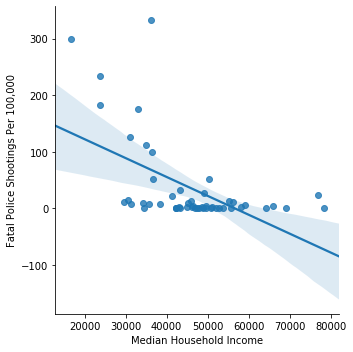

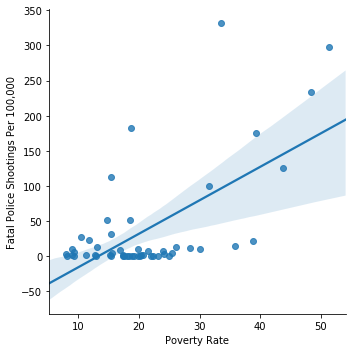

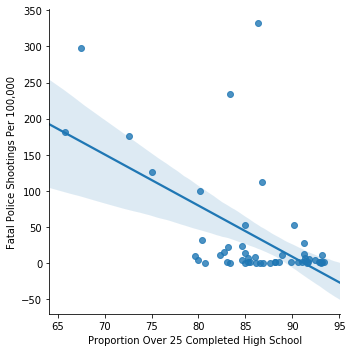

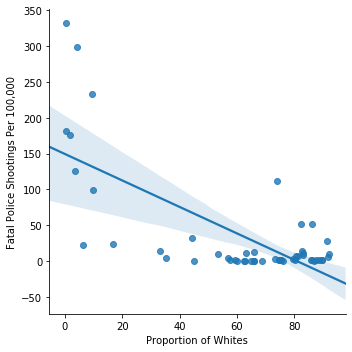

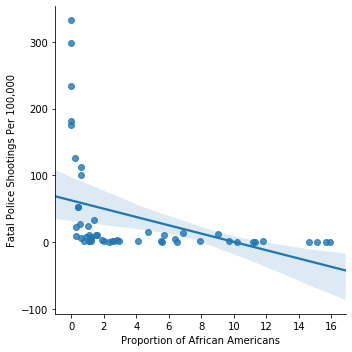

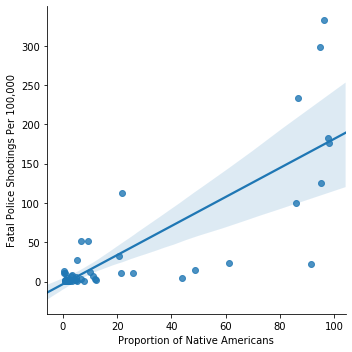

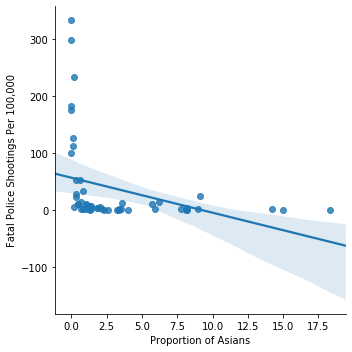

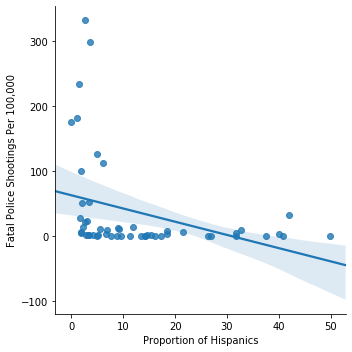

In [53]:
'plotting NA'
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_n)

sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_n)

sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_n)

sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_n)

sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_n)

sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_n)

sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_n)

sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_n)

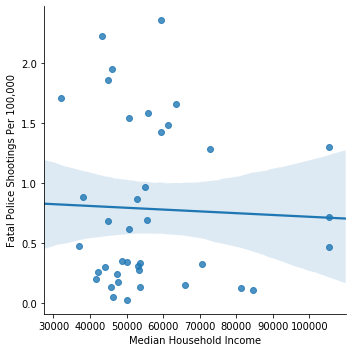

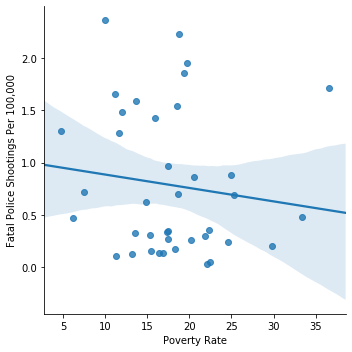

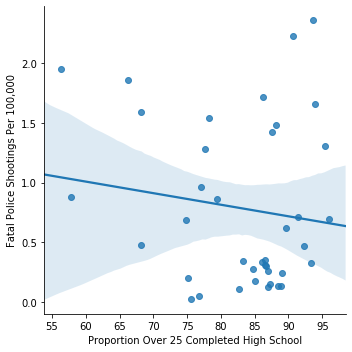

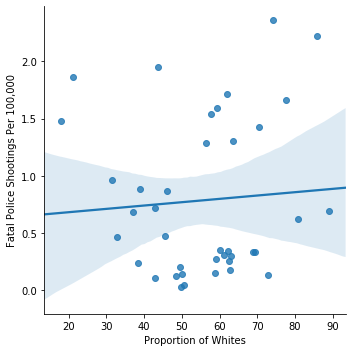

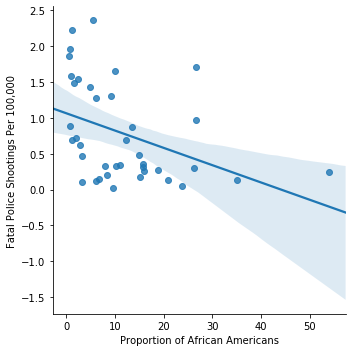

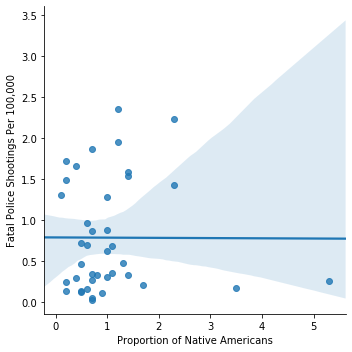

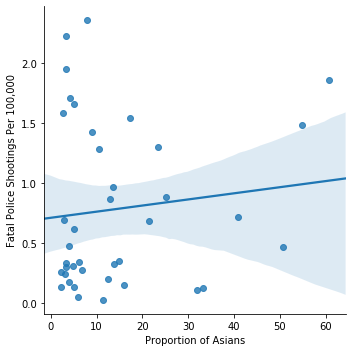

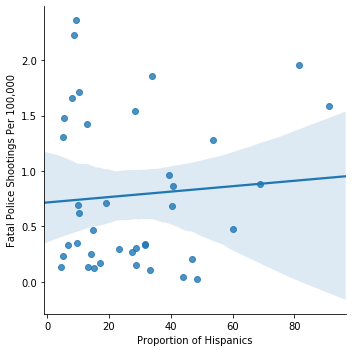

In [54]:
'plotting asian'
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_a)
sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_a)
sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_a)
sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_a)
sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_a)
sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_a)
sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_a)
sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_a)

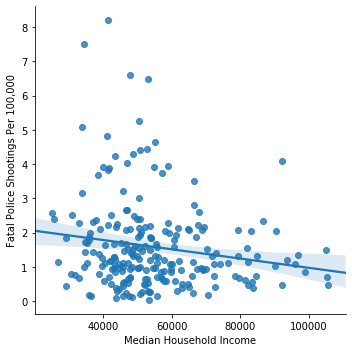

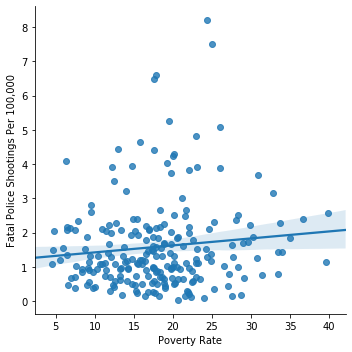

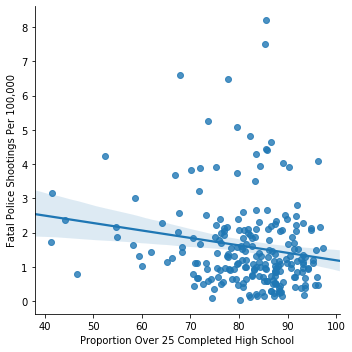

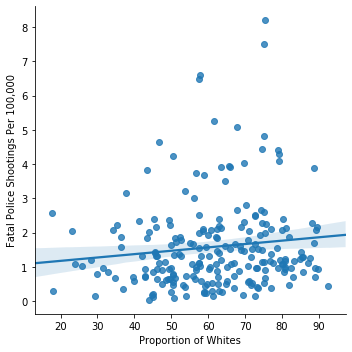

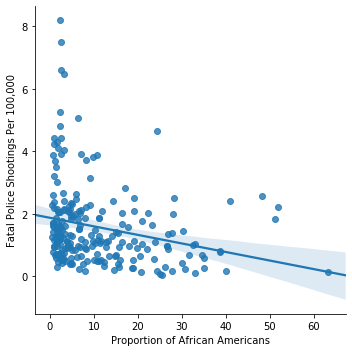

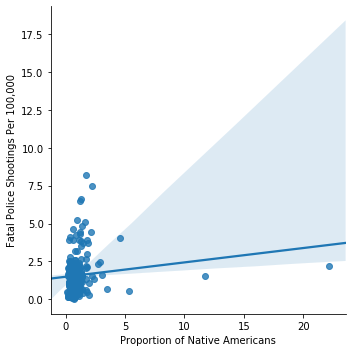

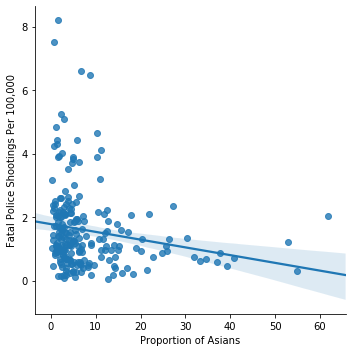

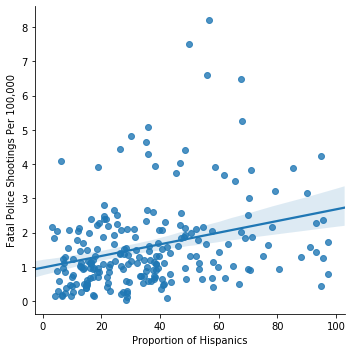

In [55]:
'plotting hispanic'
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_h)
sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_h)
sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_h)
sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_h)
sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_h)
sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_h)
sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_h)
sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_h)

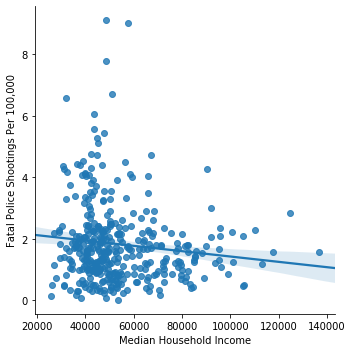

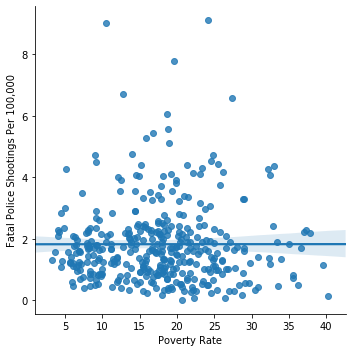

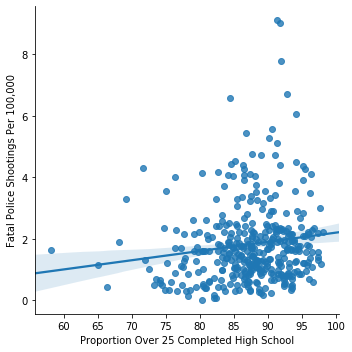

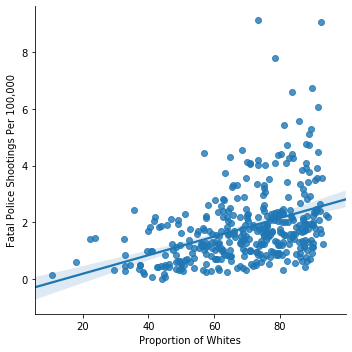

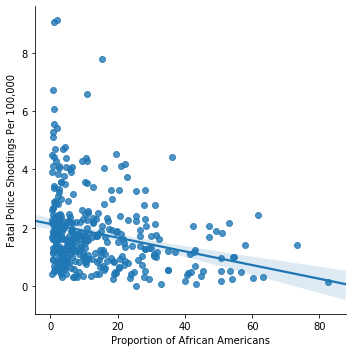

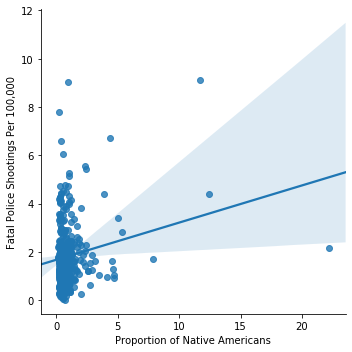

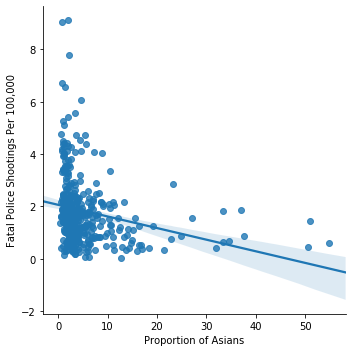

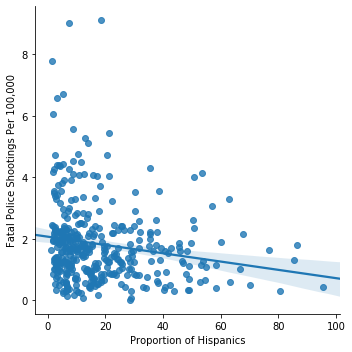

In [56]:
'plotting white'
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_w)
sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_w)
sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_w)
sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_w)
sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_w)
sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_w)
sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_w)
sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_w)

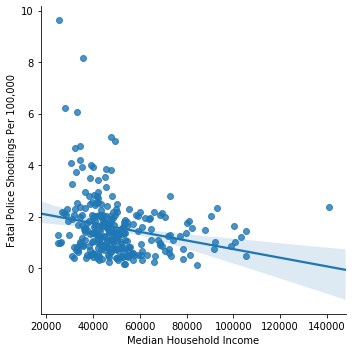

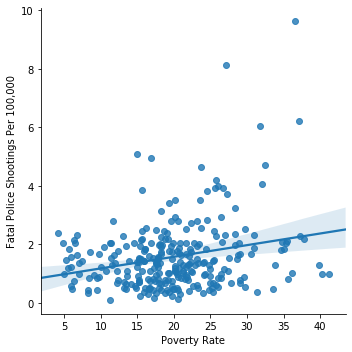

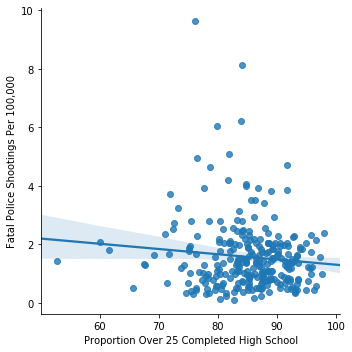

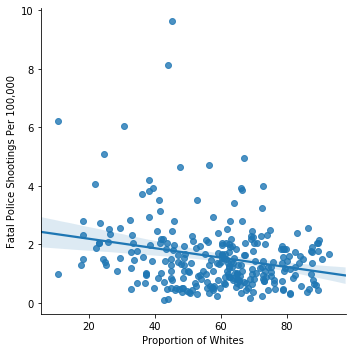

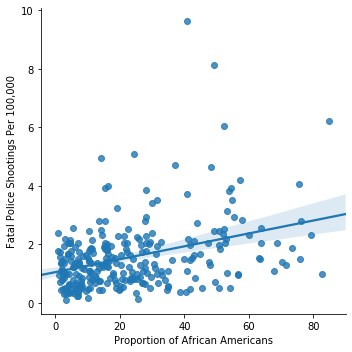

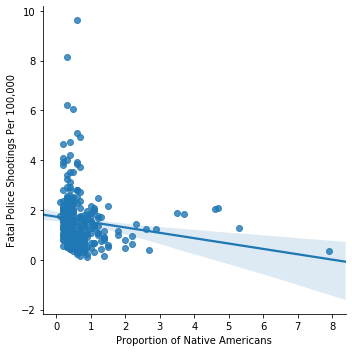

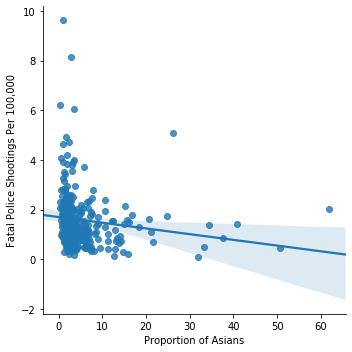

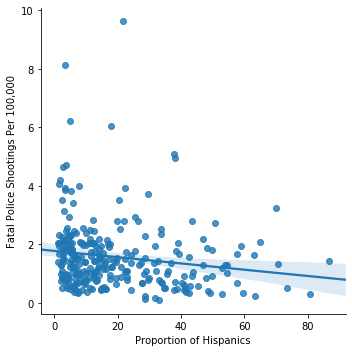

In [57]:
'plotting black'
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_b)
sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_b)
sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_b)
sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_b)
sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_b)
sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_b)
sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_b)
sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_b)

In [58]:
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final)

sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final)

sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final)

sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final)

sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final)

sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final)

sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final)

sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final)

NameError: name 'Final' is not defined

In [ ]:
Final_without_single_fatals=Final.copy()

In [ ]:
'dropping cities with only one fatal police shooting'
drop_these = Final_without_single_fatals[Final_without_single_fatals['Fatal Police Shootings'] == 1 ].index
Final_without_single_fatals.drop(drop_these , inplace=True)
Final_without_single_fatals=Final_without_single_fatals.drop([1568])
Final_without_single_fatals

In [ ]:
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

In [ ]:
'dropping cities with less than 40,000 people'
Final_over_arbitrary_pop=Final.copy()
drop_these2 = Final_over_arbitrary_pop[Final_over_arbitrary_pop['Population'] <= 40000 ].index
Final_over_arbitrary_pop.drop(drop_these2, inplace=True)

In [ ]:
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

In [ ]:
'dropping cities with less than 40,000 people and with only one shooting'
Final_over_arbitrary_pop_and_shoot=Final.copy()
drop_these31 = Final_over_arbitrary_pop_and_shoot[Final_over_arbitrary_pop_and_shoot['Population'] <= 40000 ].index
Final_over_arbitrary_pop_and_shoot.drop(drop_these31, inplace=True)
drop_these32 = Final_over_arbitrary_pop_and_shoot[Final_over_arbitrary_pop_and_shoot['Fatal Police Shootings'] == 1 ].index
Final_over_arbitrary_pop_and_shoot.drop(drop_these32, inplace=True)
print(len(Final_over_arbitrary_pop_and_shoot))

sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop_and_shoot)

sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop_and_shoot)

sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop_and_shoot)

sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop_and_shoot)

sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop_and_shoot)

sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop_and_shoot)

sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop_and_shoot)

sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop_and_shoot)

In [ ]:
#DON'T DELETE THIS




'''NOTE TO LARRY LATER: I HEAVILY LEAN TOWARDS JUST USING ==, MESS AROUND WITH THE CLEANING OF Population A BIT TO SEE JUST HOW MUCH WE REALLY NEED TO CLEAN THE SHIT
ONE PARTICULAR NOTE IS ANCHORAGE, WHY IS IT EMPTY?'''
'having a space messed things up about as much as keeping CDP'
'spaces and city no lowercase did about the same, one more knocked off'
'lower case removed 3 from the good list'
'Anchorage is Anchorage municipality...'
'town and village also had to be removed, they started with lowercases'
'''put Affton MO into presentation as an example of what to do with CDPs and 
why you had to strike them off''' '~300'
"Athens, georgia, is actually Athens-Clarke County unified government"
"Augusta, georgia has the same problem"
"Barona Indian Reservation, Indian Reservations probably aren't counted"
"Boise Idaho, is Boise City, Idaho in the Census..."
"Bon Aqua TX, is Bon Aqua Junction"
"Braintree MA is Braintree Town city"
"Bronx, Brooklyn, Queens aren't in NY..."
"Byram NJ, Byram Township isn't on the excel..."
"Louisville KY is Louisville/Jefferson County metro government"'~4'
"Nashville is Nashville-Davidson metropolitan government"'~10'
"Honolulu had Urban in front of it"
"the ones with a long ass name are double counted too..."
"Florence CA is Florence-Graham CA"
"St in police is St. in population"'~20'
'''  everyting with a - in it
['Grant-Valkaria', 1, 'FL', 0.00025974025974025974]
['Helena-West Helena', 1, 'AR', 8.141996417521577e-05]
['Opa-Locka', 1, 'FL']
['Pinetop-Lakeside', 1, 'AZ', 0.00023353573096683791]
['Soddy-Daisy', 2, 'TN', 0.00015730690577316344]
['Winston-Salem', 1, 'NC', 4.3550782389805635e-06]'''
'''for some reason a lot of the cities had (balance) in the names, we weren't
sure why it's there because the line above them always had the same city
Happened to Athens, August GA, Indianopolis, Louisville, Nashville
Most didn't have more than 5000 ppl difference, but Nashville had 20k 
differenceand Louisville has a 200k difference...
'''
'''Geneva WI isnt in census,  Hollywood isnt in the Census(prob belings with 
the NY stuff),  Puna isnt in Census,  theres like 50 more in the cities with 
only one police shootings, but Im not gonna go through all of them'''





"we should manually Add Washington DC, Boise and Louisville"


In [ ]:
'''for Median Income and Race: modified Washington DC and indianopolis to remove hanging space, New York City changed to New York, Boise City changed to Boise'''

In [ ]:
'''for all the other ones and Race, Athens, Augusta, Butte, Louisville, and Nashville needed to have their (balance) parts removed'''

In [ ]:
'I should also split this by racial data too'
'Also lets include racial data as well'

In [ ]:
'this thing is up to date as of 11/07/19'